<a href="https://colab.research.google.com/github/sidneyjunior0811/Python/blob/main/Boston_House_Prices_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import os

os.environ['KAGGLE_USERNAME'] = 'sidneyjunior11'
os.environ['KAGGLE_KEY'] = '8d37090fd78cd9cd8cf7b405d475c52d'

In [88]:
!mkdir -p ~/.kaggle
!cp kaggle.json~/.kaggle/

cp: missing destination file operand after 'kaggle.json~/.kaggle/'
Try 'cp --help' for more information.


In [89]:
!kaggle datasets download -d vikrishnan/boston-house-prices

boston-house-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [90]:

import zipfile
zip_ref = zipfile.ZipFile('/content/boston-house-prices.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [91]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics

In [92]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [93]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [94]:
# Número de linhas e colunas da base de dados
df.shape

(506, 14)

In [95]:
# Número de linhas em branco
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [96]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### **Correlação**

In [97]:
correlacao = df.corr()

<Axes: >

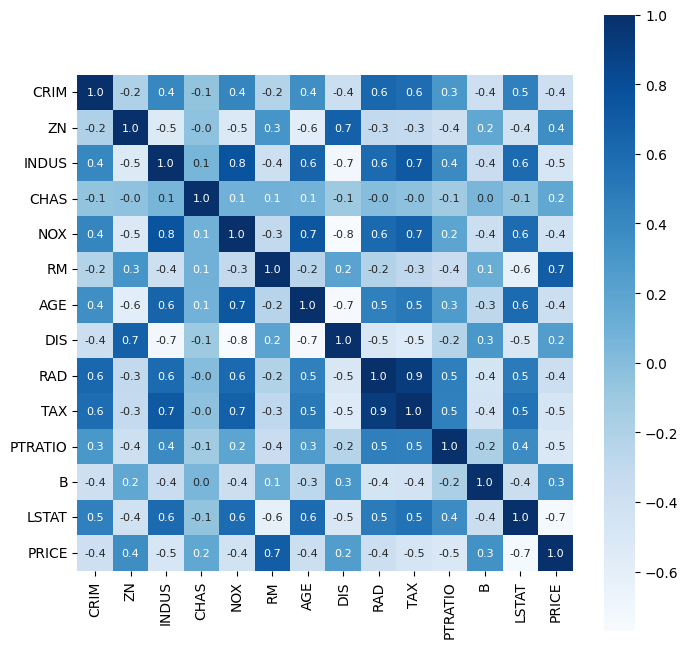

In [98]:
# Plotando
plt.figure(figsize= (8,8))
sns.heatmap(correlacao, cbar=True, square = True, fmt = '.1f', annot=True, annot_kws={'size': 8}, cmap= 'Blues')


### **Separando dados para treino e teste**

In [99]:
X = df.drop(columns='PRICE', axis = 1)
Y = df['PRICE']

In [100]:
print(X.shape, Y.shape)

(506, 13) (506,)


In [101]:
# Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2)

In [102]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, y_train.shape, y_test.shape)

(506, 13) (404, 13) (102, 13)
(506,) (404,) (102,)


###**Importando XGBRFRegressor**

In [103]:
modelo = XGBRFRegressor()

In [104]:
# Treinar o modelo X_train e y_train
modelo.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

###**Previsão do modelo - Train**

In [105]:
train_previsao = modelo.predict(X_train)

In [ ]:
print(train_previsao)

In [118]:
# R² score error
score_1 = metrics.r2_score(y_train, train_previsao)

# Mean absolute error
score_2 = metrics.mean_absolute_error(y_train, train_previsao)

print("R² error: ", score_1)
print("Mean absolute: ", score_2)

R² error:  0.9638005018704447
Mean absolute:  1.3740199532839332


###**Gráfico - Train**

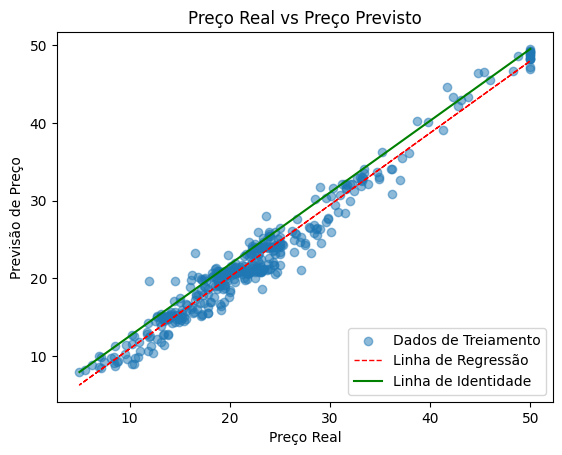

In [155]:
# Previsão de Preço vs Preço atual

plt.scatter(y_train, train_previsao, alpha = 0.5, label = 'Dados de Treiamento')

# Coeficiente
coef = np.polyfit(y_train, train_previsao, 1)
poly1d_coef = np.poly1d(coef)
plt.plot(y_train, poly1d_coef(y_train), color = 'red', linestyle = '--', linewidth = 1, label='Linha de Regressão')

# Linha de identidade - (No EIXO X: São os Reais ou Observados já no EIXO Y: São os Valores PREVISTOS)
plt.plot([min(y_train), max(y_train)], [min(train_previsao), max(train_previsao)], color='green', linestyle='-', label='Linha de Identidade')


plt.xlabel('Preço Real')
plt.ylabel('Previsão de Preço')
plt.title('Preço Real vs Preço Previsto')
plt.legend(loc = 'lower right')

plt.show()

### **Previsão do Modelo - Teste**

In [112]:
test_previsao = modelo.predict(X_test)

In [ ]:
print(test_previsao)

In [114]:
#R² score error
score_3 = metrics.r2_score(y_test, test_previsao)

# Mean absolute error
score_4 = metrics.mean_absolute_error(y_test, test_previsao)

In [115]:
print("R² score: ", score_3)
print("Mean Absolute error: ", score_4)

R² score:  0.9012963200692172
Mean Absolute error:  2.153043132669785


###**Gráfico - Teste**

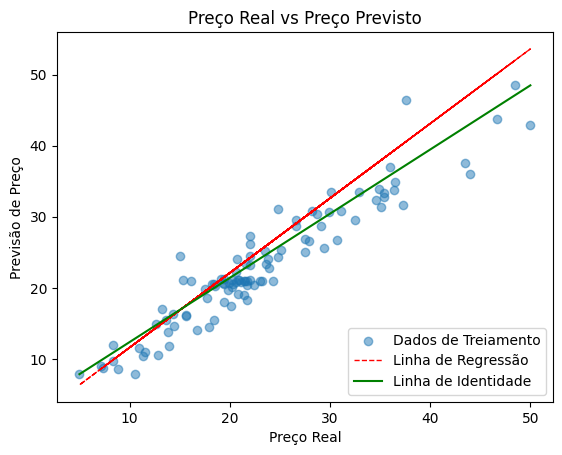

In [159]:
# Previsão de Preço vs Preço atual

plt.scatter(y_test, test_previsao, alpha = 0.5, label = 'Dados de Treiamento')

# Coeficiente
coef_teste = np.polyfit(y_test, test_previsao, 1)
poly1d_coef_teste = np.poly1d(coef_teste)
plt.plot(y_test, poly1d_coef(y_test), color = 'red', linestyle = '--', linewidth = 1, label='Linha de Regressão')

# Linha de identidade
plt.plot([min(y_test), max(y_test)], [min(test_previsao), max(test_previsao)], color='green', linestyle='-', label='Linha de Identidade')


plt.xlabel('Preço Real')
plt.ylabel('Previsão de Preço')
plt.title('Preço Real vs Preço Previsto')
plt.legend(loc = 'lower right')

plt.show()